In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Getting data of crude price
df = pd.read_html('https://www.eia.gov/opendata/qb.php?sdid=PET.RBRTE.D')

In [3]:
df

[                             Series Name    Period Frequency  Value  \
 0     Europe Brent Spot Price FOB, Daily  20221219         D  81.66   
 1     Europe Brent Spot Price FOB, Daily  20221216         D  80.20   
 2     Europe Brent Spot Price FOB, Daily  20221215         D  82.34   
 3     Europe Brent Spot Price FOB, Daily  20221214         D  83.33   
 4     Europe Brent Spot Price FOB, Daily  20221212         D  78.00   
 ...                                  ...       ...       ...    ...   
 9041  Europe Brent Spot Price FOB, Daily  19870526         D  18.63   
 9042  Europe Brent Spot Price FOB, Daily  19870525         D  18.60   
 9043  Europe Brent Spot Price FOB, Daily  19870522         D  18.55   
 9044  Europe Brent Spot Price FOB, Daily  19870521         D  18.45   
 9045  Europe Brent Spot Price FOB, Daily  19870520         D  18.63   
 
                    Units  
 0     Dollars per Barrel  
 1     Dollars per Barrel  
 2     Dollars per Barrel  
 3     Dollars per Bar

In [4]:
len(df) #df is list

1

In [5]:
df = df[0] #Getting dataframe out of list

In [6]:
df

,Series Name,Period,Frequency,Value,Units
0,"Europe Brent Spot Price FOB, Daily",20221219,D,81.66,Dollars per Barrel
1,"Europe Brent Spot Price FOB, Daily",20221216,D,80.20,Dollars per Barrel
2,"Europe Brent Spot Price FOB, Daily",20221215,D,82.34,Dollars per Barrel
3,"Europe Brent Spot Price FOB, Daily",20221214,D,83.33,Dollars per Barrel
4,"Europe Brent Spot Price FOB, Daily",20221212,D,78.00,Dollars per Barrel
...,...,...,...,...,...
9041,"Europe Brent Spot Price FOB, Daily",19870526,D,18.63,Dollars per Barrel
9042,"Europe Brent Spot Price FOB, Daily",19870525,D,18.60,Dollars per Barrel
9043,"Europe Brent Spot Price FOB, Daily",19870522,D,18.55,Dollars per Barrel
9044,"Europe Brent Spot Price FOB, Daily",19870521,D,18.45,Dollars per Barrel


In [7]:
df.head()

,Series Name,Period,Frequency,Value,Units
0,"Europe Brent Spot Price FOB, Daily",20221219,D,81.66,Dollars per Barrel
1,"Europe Brent Spot Price FOB, Daily",20221216,D,80.20,Dollars per Barrel
2,"Europe Brent Spot Price FOB, Daily",20221215,D,82.34,Dollars per Barrel
3,"Europe Brent Spot Price FOB, Daily",20221214,D,83.33,Dollars per Barrel
4,"Europe Brent Spot Price FOB, Daily",20221212,D,78.00,Dollars per Barrel


In [8]:
#Just taking time and crude price
df = df[['Period','Value']]

In [9]:
df

,Period,Value
0,20221219,81.66
1,20221216,80.20
2,20221215,82.34
3,20221214,83.33
4,20221212,78.00
...,...,...
9041,19870526,18.63
9042,19870525,18.60
9043,19870522,18.55
9044,19870521,18.45


In [10]:
#Converting period to datetime
df['Date'] = pd.to_datetime(df['Period'], format='%Y%m%d')

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df

,Period,Value,Date
0,20221219,81.66,2022-12-19
1,20221216,80.20,2022-12-16
2,20221215,82.34,2022-12-15
3,20221214,83.33,2022-12-14
4,20221212,78.00,2022-12-12
...,...,...,...
9041,19870526,18.63,1987-05-26
9042,19870525,18.60,1987-05-25
9043,19870522,18.55,1987-05-22
9044,19870521,18.45,1987-05-21


In [12]:
df = df.drop('Period',axis = 1)

In [13]:
df = df.set_index('Date')

In [14]:
#Reversing
df = df[-1::-1]

In [15]:
df

,Value
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-12-12,78.00
2022-12-14,83.33
2022-12-15,82.34


<AxesSubplot:xlabel='Date'>

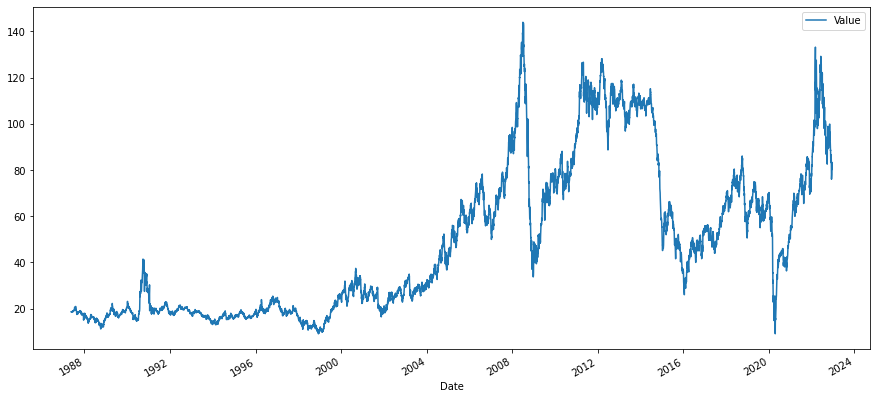

In [16]:
df.plot(figsize = (15,7))

In [17]:
#Getting value of crude price
df1 = df.reset_index()['Value']

In [18]:
df1

0       18.63
1       18.45
2       18.55
3       18.60
4       18.63
        ...  
9041    78.00
9042    83.33
9043    82.34
9044    80.20
9045    81.66
Name: Value, Length: 9046, dtype: float64

In [19]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(9046, 1)

In [21]:
df1

array([[-0.9096979 ],
       [-0.91517448],
       [-0.91213194],
       ...,
       [ 1.02870799],
       [ 0.96359751],
       [ 1.00801868]])

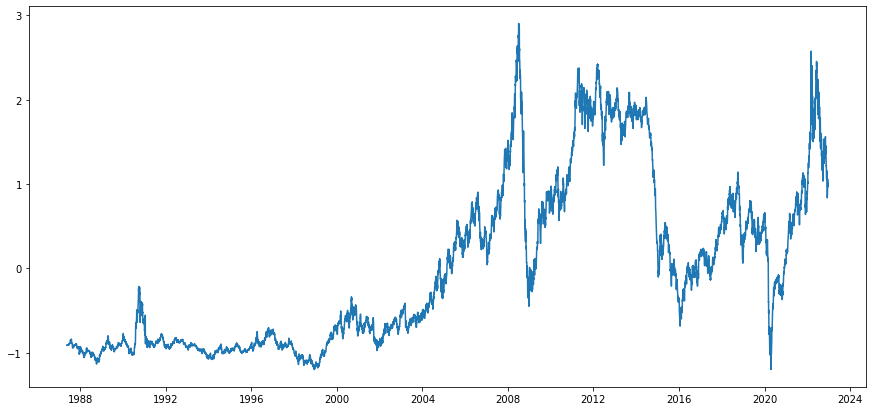

In [22]:
plt.figure(figsize=(15,7))
plt.plot(df.index,df1)

In [25]:
w = int(input(' Enter window size: '))

 Enter window size: 100


In [26]:
training_size = int(len(df1)*0.96)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size+w,:],df1[training_size:len(df1),:]

In [27]:
train_data.shape, test_data.shape

((8784, 1), (362, 1))

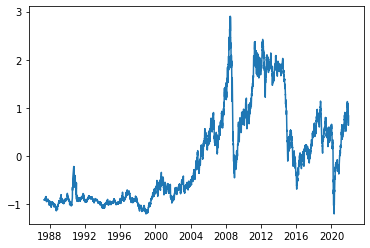

In [28]:
plt.plot(df.index[:training_size+100],train_data)


In [29]:
def create_dataset(dataset,time_step = 1):

    dataX, dataY = [],[]

    for i in range(len(dataset) - time_step):

        a = dataset[i:(i+time_step),0]   #i = 0 then 0,1,2,3 will be x and y = 4 (if our time step is 4)

        dataX.append(a)

        dataY.append(dataset[i+time_step,0])

    return np.array(dataX), np.array(dataY)

In [30]:
time_step = w
#Using 100 consecutive values predicting 101th value
#f1-------f100 = X
#f101 = y
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [31]:
X_train.shape,X_test.shape

((8684, 100), (262, 100))

In [32]:
#Making data 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [33]:
X_train.shape,X_test.shape

((8684, 100, 1), (262, 100, 1))

In [34]:
X_train

array([[[-0.9096979 ],
        [-0.91517448],
        [-0.91213194],
        ...,
        [-0.90513408],
        [-0.91061067],
        [-0.91121917]],

       [[-0.91517448],
        [-0.91213194],
        [-0.91061067],
        ...,
        [-0.91061067],
        [-0.91121917],
        [-0.9096979 ]],

       [[-0.91213194],
        [-0.91061067],
        [-0.9096979 ],
        ...,
        [-0.91121917],
        [-0.9096979 ],
        [-0.91061067]],

       ...,

       [[ 0.78895539],
        [ 0.63287279],
        [ 0.65417061],
        ...,
        [ 0.63895788],
        [ 0.6702961 ],
        [ 0.67485992]],

       [[ 0.63287279],
        [ 0.65417061],
        [ 0.73053851],
        ...,
        [ 0.6702961 ],
        [ 0.67485992],
        [ 0.75609589]],

       [[ 0.65417061],
        [ 0.73053851],
        [ 0.78256604],
        ...,
        [ 0.67485992],
        [ 0.75609589],
        [ 0.82181488]]])

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model = Sequential() #sequential model
model.add(LSTM(50,return_sequences = True, input_shape = (100,1))) # input shape of batch
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 1,batch_size = 128, verbose =1)

68/68 [==============================] - 28s 304ms/step - loss: 0.0879 - val_loss: 0.0454


In [39]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [40]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [41]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.66996757298207

In [42]:
math.sqrt(mean_squared_error(y_test,test_predict))

99.27852205504783

In [43]:
train_predict.shape

(8684, 1)

In [44]:
test_predict.shape

(262, 1)

In [45]:
a = train_predict.reshape(train_predict.shape[0],)

In [46]:
b = test_predict.reshape(test_predict.shape[0],)

In [47]:
c = list(a)+list(b) # Total

In [48]:
len(c)

8946

In [49]:
df

,Value
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-12-12,78.00
2022-12-14,83.33
2022-12-15,82.34


In [ ]:
# exact difference of 100

In [50]:
t = []
for i in range(100):
    t.append(np.NaN)

In [51]:
d = t+c

In [52]:
len(d)

9046

In [53]:
df['Predicted Price'] = d

In [54]:
df

,Value,Predicted Price
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,NaN
1987-05-22,18.55,NaN
1987-05-25,18.60,NaN
1987-05-26,18.63,NaN
...,...,...
2022-12-12,78.00,85.462479
2022-12-14,83.33,84.565475
2022-12-15,82.34,83.748543


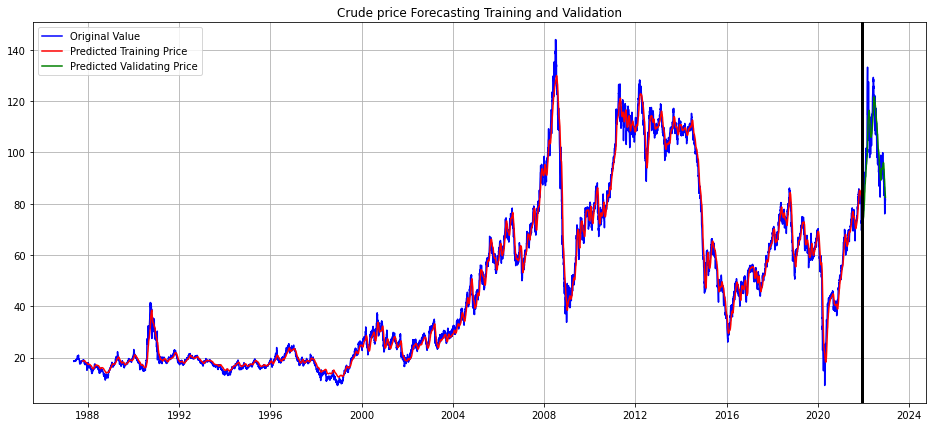

In [55]:
plt.figure(figsize = (16,7))
plt.grid(True)
plt.title('Crude price Forecasting Training and Validation')
plt.plot(df.index,df['Value'],label = "Original Value",c = 'blue')
plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicted Training Price",c = 'red')
plt.plot(df.index[train_predict.shape[0]+100:],df['Predicted Price'][train_predict.shape[0]+w:],label = "Predicted Validating Price", c = 'green')
plt.axvline(df.index[train_predict.shape[0]+w], color='black',lw=3)

plt.legend()

## Forecaasting in future

In [56]:
df

,Value,Predicted Price
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,NaN
1987-05-22,18.55,NaN
1987-05-25,18.60,NaN
1987-05-26,18.63,NaN
...,...,...
2022-12-12,78.00,85.462479
2022-12-14,83.33,84.565475
2022-12-15,82.34,83.748543


In [57]:
ddf = df[100:]

In [58]:
ddf

,Value,Predicted Price
Date,,
1987-10-08,18.63,18.590397
1987-10-09,18.60,18.606668
1987-10-12,18.55,18.621763
1987-10-13,18.55,18.635233
1987-10-14,18.68,18.646811
...,...,...
2022-12-12,78.00,85.462479
2022-12-14,83.33,84.565475
2022-12-15,82.34,83.748543


In [59]:
test_data.shape

(362, 1)

In [60]:
# for next one day price, last 100 days data is needed
x_input = test_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [61]:
x_input

array([[1.86053999, 1.91621858, 1.7513126 , 1.7640913 , 1.6213959 ,
        1.5048664 , 1.57545346, 1.67129365, 1.68194256, 1.71997438,
        1.78478061, 1.67859576, 1.51277702, 1.42484744, 1.4814388 ,
        1.45496865, 1.45801119, 1.41571981, 1.55050458, 1.56206626,
        1.52981527, 1.60040233, 1.54594077, 1.46105374, 1.32992002,
        1.35578166, 1.39016242, 1.3052754 , 1.16531829, 1.20061182,
        1.31288176, 1.36673482, 1.32383493, 1.34787104, 1.23986066,
        1.24442448, 1.24442448, 1.25020532, 1.25750743, 1.27393718,
        1.08803763, 1.03509734, 1.1391524 , 1.24807554, 1.24381597,
        1.22829899, 1.2824563 , 1.3755582 , 1.39411773, 1.43367083,
        1.53194506, 1.4787005 , 1.41906661, 1.36643057, 1.41876235,
        1.32931151, 1.29340947, 1.24533725, 1.30253711, 1.30801369,
        1.31714133, 1.30953496, 1.35091358, 1.38864115, 1.40294112,
        1.362171  , 1.41754534, 1.44644952, 1.42271766, 1.5517216 ,
        1.56206626, 1.47018138, 1.35456464, 1.39

In [62]:
temp_input = list(x_input)


In [63]:
temp_input

[array([1.86053999, 1.91621858, 1.7513126 , 1.7640913 , 1.6213959 ,
        1.5048664 , 1.57545346, 1.67129365, 1.68194256, 1.71997438,
        1.78478061, 1.67859576, 1.51277702, 1.42484744, 1.4814388 ,
        1.45496865, 1.45801119, 1.41571981, 1.55050458, 1.56206626,
        1.52981527, 1.60040233, 1.54594077, 1.46105374, 1.32992002,
        1.35578166, 1.39016242, 1.3052754 , 1.16531829, 1.20061182,
        1.31288176, 1.36673482, 1.32383493, 1.34787104, 1.23986066,
        1.24442448, 1.24442448, 1.25020532, 1.25750743, 1.27393718,
        1.08803763, 1.03509734, 1.1391524 , 1.24807554, 1.24381597,
        1.22829899, 1.2824563 , 1.3755582 , 1.39411773, 1.43367083,
        1.53194506, 1.4787005 , 1.41906661, 1.36643057, 1.41876235,
        1.32931151, 1.29340947, 1.24533725, 1.30253711, 1.30801369,
        1.31714133, 1.30953496, 1.35091358, 1.38864115, 1.40294112,
        1.362171  , 1.41754534, 1.44644952, 1.42271766, 1.5517216 ,
        1.56206626, 1.47018138, 1.35456464, 1.39

In [64]:
temp_input = temp_input[0].tolist()

In [65]:
temp_input

[1.8605399949745078,
 1.9162185820203577,
 1.7513126029009551,
 1.7640912950098389,
 1.621395899793972,
 1.5048663979439145,
 1.5754534591167955,
 1.671293649933422,
 1.6819425600241587,
 1.7199743817767883,
 1.7847806060432692,
 1.6785957597099272,
 1.5127770168684618,
 1.424847444976382,
 1.481438795744295,
 1.4549686478044646,
 1.4580111935446751,
 1.415719807755751,
 1.5505045840470701,
 1.5620662578598699,
 1.5298152730136398,
 1.6004023341865203,
 1.545940765436755,
 1.4610537392848852,
 1.329920017881818,
 1.3557816566736065,
 1.3901624235379837,
 1.3052753973861144,
 1.165318293336437,
 1.2006118239228771,
 1.3128817617366404,
 1.3667348213383639,
 1.3238349264013978,
 1.3478710377490595,
 1.2398606639715912,
 1.2444244825819069,
 1.2444244825819069,
 1.2502053194883065,
 1.2575074292648114,
 1.2739371762619476,
 1.0880376315350937,
 1.035097335655433,
 1.1391523999706277,
 1.248075537470159,
 1.2438159734338645,
 1.228298990158792,
 1.2824563043345365,
 1.3755582039849736,
 1.

## Demonstrate predictions for next 30 days:

- First time else loop will run, reshape is done and after that it passes to model and prediction is done for 101st day, after that this 101th day data is added in final output. And this 101 day data will be used in previous input list. Now the input list will have 101 elements so the if loop will run and the data for first day is dropped so that we can take data from day 2 to day 101 and predict data for day 102, in a similary way the loops will run for 30 days

- for i = 0 (first loop in while), the else loop will run because 100 elements are present in temp_input. After adding data for 101 day from forecasting, the if loop will run and 1st day data will be excluded

In [66]:
lst_output = []
n_steps = 100
i = 0 
while i<30:   #For 30 days forecast
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:]) # Taking x_input values from 2nd value onward, so that total value will be 100
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1)) #making tensor of 1 batch, with n rows and 1 column
        #print(x_input)
        yhat = model.predict(x_input,verbose = 1)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist()) #Adding forecasted value to the temp_input, for further forecasting, now there are 102 values in temp_input
        temp_input = temp_input[1:] #Because after adding the above yhat[0], total number of elements in temp_input is 102, so we will select last 101 elements so that again if loop will go on running for 30 days
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:        #first loop will go inside this
        x_input = x_input.reshape((1,n_steps,1))  #last 100 days data, nsteps = 100 and reshaping it so that we can feed it in LSTM
        yhat = model.predict(x_input,verbose = 0) #Taking prediction from model 
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) #Adding predicted value of 101 day in temp_input, so that this value can be used for forecasting values for days starting from day 102
        print(len(temp_input))
        lst_output.extend(yhat.tolist())  #Adding 101 day forecast to Output forecasting list 
        i = i+1
        
print(lst_output)

[1.0168097]
101
1 day input [1.91621858 1.7513126  1.7640913  1.6213959  1.5048664  1.57545346
 1.67129365 1.68194256 1.71997438 1.78478061 1.67859576 1.51277702
 1.42484744 1.4814388  1.45496865 1.45801119 1.41571981 1.55050458
 1.56206626 1.52981527 1.60040233 1.54594077 1.46105374 1.32992002
 1.35578166 1.39016242 1.3052754  1.16531829 1.20061182 1.31288176
 1.36673482 1.32383493 1.34787104 1.23986066 1.24442448 1.24442448
 1.25020532 1.25750743 1.27393718 1.08803763 1.03509734 1.1391524
 1.24807554 1.24381597 1.22829899 1.2824563  1.3755582  1.39411773
 1.43367083 1.53194506 1.4787005  1.41906661 1.36643057 1.41876235
 1.32931151 1.29340947 1.24533725 1.30253711 1.30801369 1.31714133
 1.30953496 1.35091358 1.38864115 1.40294112 1.362171   1.41754534
 1.44644952 1.42271766 1.5517216  1.56206626 1.47018138 1.35456464
 1.39107519 1.45557716 1.37099439 1.39259646 1.34117744 1.29219245
 1.22921175 1.21430328 1.22069263 1.13702262 1.12759073 1.06095897
 1.06400152 1.05548239 1.12819924 1

1/1 [==============================] - 0s 46ms/step
7 day output [[0.9887715]]
8 day input [1.68194256 1.71997438 1.78478061 1.67859576 1.51277702 1.42484744
 1.4814388  1.45496865 1.45801119 1.41571981 1.55050458 1.56206626
 1.52981527 1.60040233 1.54594077 1.46105374 1.32992002 1.35578166
 1.39016242 1.3052754  1.16531829 1.20061182 1.31288176 1.36673482
 1.32383493 1.34787104 1.23986066 1.24442448 1.24442448 1.25020532
 1.25750743 1.27393718 1.08803763 1.03509734 1.1391524  1.24807554
 1.24381597 1.22829899 1.2824563  1.3755582  1.39411773 1.43367083
 1.53194506 1.4787005  1.41906661 1.36643057 1.41876235 1.32931151
 1.29340947 1.24533725 1.30253711 1.30801369 1.31714133 1.30953496
 1.35091358 1.38864115 1.40294112 1.362171   1.41754534 1.44644952
 1.42271766 1.5517216  1.56206626 1.47018138 1.35456464 1.39107519
 1.45557716 1.37099439 1.39259646 1.34117744 1.29219245 1.22921175
 1.21430328 1.22069263 1.13702262 1.12759073 1.06095897 1.06400152
 1.05548239 1.12819924 1.14858429 1.15

1/1 [==============================] - 0s 57ms/step
14 day output [[1.0009614]]
15 day input [1.45496865 1.45801119 1.41571981 1.55050458 1.56206626 1.52981527
 1.60040233 1.54594077 1.46105374 1.32992002 1.35578166 1.39016242
 1.3052754  1.16531829 1.20061182 1.31288176 1.36673482 1.32383493
 1.34787104 1.23986066 1.24442448 1.24442448 1.25020532 1.25750743
 1.27393718 1.08803763 1.03509734 1.1391524  1.24807554 1.24381597
 1.22829899 1.2824563  1.3755582  1.39411773 1.43367083 1.53194506
 1.4787005  1.41906661 1.36643057 1.41876235 1.32931151 1.29340947
 1.24533725 1.30253711 1.30801369 1.31714133 1.30953496 1.35091358
 1.38864115 1.40294112 1.362171   1.41754534 1.44644952 1.42271766
 1.5517216  1.56206626 1.47018138 1.35456464 1.39107519 1.45557716
 1.37099439 1.39259646 1.34117744 1.29219245 1.22921175 1.21430328
 1.22069263 1.13702262 1.12759073 1.06095897 1.06400152 1.05548239
 1.12819924 1.14858429 1.15649491 1.05974196 0.95507838 0.86958285
 0.8364191  0.84706801 0.8966615  1.

1/1 [==============================] - 0s 40ms/step
21 day output [[1.0141394]]
22 day input [1.54594077 1.46105374 1.32992002 1.35578166 1.39016242 1.3052754
 1.16531829 1.20061182 1.31288176 1.36673482 1.32383493 1.34787104
 1.23986066 1.24442448 1.24442448 1.25020532 1.25750743 1.27393718
 1.08803763 1.03509734 1.1391524  1.24807554 1.24381597 1.22829899
 1.2824563  1.3755582  1.39411773 1.43367083 1.53194506 1.4787005
 1.41906661 1.36643057 1.41876235 1.32931151 1.29340947 1.24533725
 1.30253711 1.30801369 1.31714133 1.30953496 1.35091358 1.38864115
 1.40294112 1.362171   1.41754534 1.44644952 1.42271766 1.5517216
 1.56206626 1.47018138 1.35456464 1.39107519 1.45557716 1.37099439
 1.39259646 1.34117744 1.29219245 1.22921175 1.21430328 1.22069263
 1.13702262 1.12759073 1.06095897 1.06400152 1.05548239 1.12819924
 1.14858429 1.15649491 1.05974196 0.95507838 0.86958285 0.8364191
 0.84706801 0.8966615  1.05882919 1.02870799 0.96359751 1.00801868
 1.0168097  1.00558758 0.9976458  0.9924

1/1 [==============================] - 0s 43ms/step
28 day output [[1.0277714]]
29 day input [1.20061182 1.31288176 1.36673482 1.32383493 1.34787104 1.23986066
 1.24442448 1.24442448 1.25020532 1.25750743 1.27393718 1.08803763
 1.03509734 1.1391524  1.24807554 1.24381597 1.22829899 1.2824563
 1.3755582  1.39411773 1.43367083 1.53194506 1.4787005  1.41906661
 1.36643057 1.41876235 1.32931151 1.29340947 1.24533725 1.30253711
 1.30801369 1.31714133 1.30953496 1.35091358 1.38864115 1.40294112
 1.362171   1.41754534 1.44644952 1.42271766 1.5517216  1.56206626
 1.47018138 1.35456464 1.39107519 1.45557716 1.37099439 1.39259646
 1.34117744 1.29219245 1.22921175 1.21430328 1.22069263 1.13702262
 1.12759073 1.06095897 1.06400152 1.05548239 1.12819924 1.14858429
 1.15649491 1.05974196 0.95507838 0.86958285 0.8364191  0.84706801
 0.8966615  1.05882919 1.02870799 0.96359751 1.00801868 1.0168097
 1.00558758 0.9976458  0.99246478 0.98948181 0.9881655  0.98805392
 0.9887715  0.99003023 0.99161947 0.99

In [67]:
lst_output

[[1.0168097019195557],
 [1.0055875778198242],
 [0.9976457953453064],
 [0.9924647808074951],
 [0.9894818067550659],
 [0.9881654977798462],
 [0.9880539178848267],
 [0.9887714982032776],
 [0.9900302290916443],
 [0.9916194677352905],
 [0.9933941960334778],
 [0.9952598810195923],
 [0.9971604347229004],
 [0.9990654587745667],
 [1.000961422920227],
 [1.002846360206604],
 [1.0047223567962646],
 [1.0065950155258179],
 [1.0084689855575562],
 [1.0103490352630615],
 [1.0122385025024414],
 [1.0141394138336182],
 [1.0160528421401978],
 [1.0179791450500488],
 [1.0199172496795654],
 [1.0218666791915894],
 [1.0238263607025146],
 [1.0257948637008667],
 [1.0277713537216187],
 [1.0297547578811646]]

In [68]:
forecast = scaler.inverse_transform(lst_output)

In [69]:
forecast.shape

(30, 1)

In [70]:
forecast = forecast.reshape(30,)

In [71]:
ddf

,Value,Predicted Price
Date,,
1987-10-08,18.63,18.590397
1987-10-09,18.60,18.606668
1987-10-12,18.55,18.621763
1987-10-13,18.55,18.635233
1987-10-14,18.68,18.646811
...,...,...
2022-12-12,78.00,85.462479
2022-12-14,83.33,84.565475
2022-12-15,82.34,83.748543


In [72]:
t_fut = pd.date_range('2022-12-20 00:00:00+00:00',periods=30)

In [73]:
t_fut

DatetimeIndex(['2022-12-20 00:00:00+00:00', '2022-12-21 00:00:00+00:00',
               '2022-12-22 00:00:00+00:00', '2022-12-23 00:00:00+00:00',
               '2022-12-24 00:00:00+00:00', '2022-12-25 00:00:00+00:00',
               '2022-12-26 00:00:00+00:00', '2022-12-27 00:00:00+00:00',
               '2022-12-28 00:00:00+00:00', '2022-12-29 00:00:00+00:00',
               '2022-12-30 00:00:00+00:00', '2022-12-31 00:00:00+00:00',
               '2023-01-01 00:00:00+00:00', '2023-01-02 00:00:00+00:00',
               '2023-01-03 00:00:00+00:00', '2023-01-04 00:00:00+00:00',
               '2023-01-05 00:00:00+00:00', '2023-01-06 00:00:00+00:00',
               '2023-01-07 00:00:00+00:00', '2023-01-08 00:00:00+00:00',
               '2023-01-09 00:00:00+00:00', '2023-01-10 00:00:00+00:00',
               '2023-01-11 00:00:00+00:00', '2023-01-12 00:00:00+00:00',
               '2023-01-13 00:00:00+00:00', '2023-01-14 00:00:00+00:00',
               '2023-01-15 00:00:00+00:00', '2023-0

In [74]:
dffor = pd.DataFrame({'Forecast Price':forecast},index = t_fut)

In [75]:
dffor

,Forecast Price
2022-12-20 00:00:00+00:00,81.948936
2022-12-21 00:00:00+00:00,81.580096
2022-12-22 00:00:00+00:00,81.319072
2022-12-23 00:00:00+00:00,81.148787
2022-12-24 00:00:00+00:00,81.050745
2022-12-25 00:00:00+00:00,81.007481
2022-12-26 00:00:00+00:00,81.003814
2022-12-27 00:00:00+00:00,81.027399
2022-12-28 00:00:00+00:00,81.068770
2022-12-29 00:00:00+00:00,81.121004


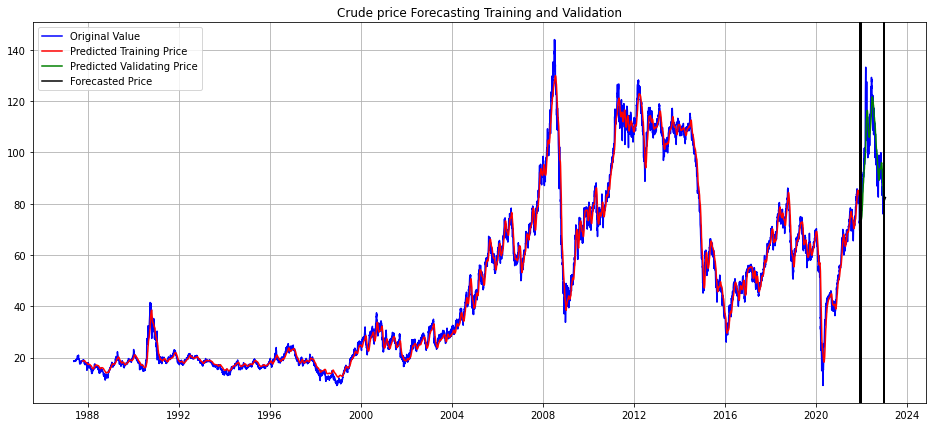

In [76]:
plt.figure(figsize = (16,7))
plt.grid(True)
plt.title('Crude price Forecasting Training and Validation')
plt.plot(df.index,df['Value'],label = "Original Value",c = 'blue')
plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicted Training Price",c = 'red')
plt.plot(df.index[train_predict.shape[0]+100:],df['Predicted Price'][train_predict.shape[0]+w:],label = "Predicted Validating Price", c = 'green')

plt.plot(dffor.index,dffor['Forecast Price'], label = 'Forecasted Price',c = 'black')


plt.axvline(df.index[train_predict.shape[0]+w], color='black',lw=3)
plt.axvline(dffor.index[0], color='black',lw=2)

plt.legend()

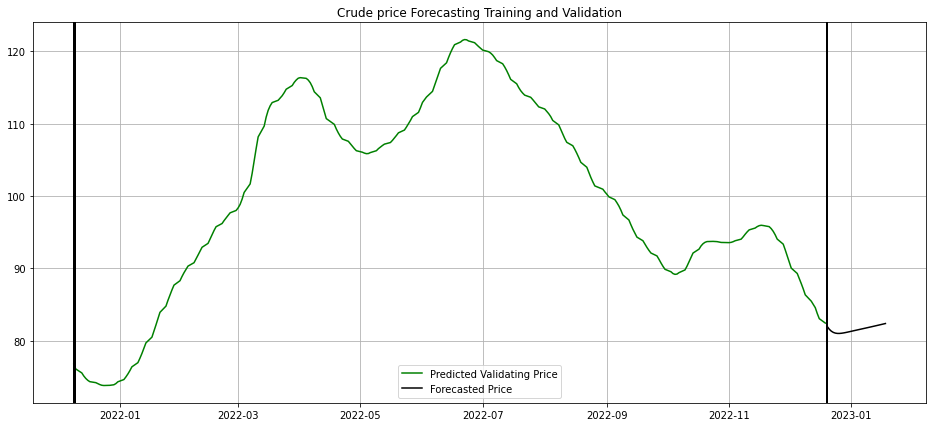

In [77]:
plt.figure(figsize = (16,7))
plt.grid(True)
plt.title('Crude price Forecasting Training and Validation')
#plt.plot(df.index,df['Value'],label = "Original Value",c = 'blue')
#plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicted Training Price",c = 'red')
plt.plot(df.index[train_predict.shape[0]+100:],df['Predicted Price'][train_predict.shape[0]+w:],label = "Predicted Validating Price", c = 'green')

plt.plot(dffor.index,dffor['Forecast Price'], label = 'Forecasted Price',c = 'black')


plt.axvline(df.index[train_predict.shape[0]+w], color='black',lw=3)
plt.axvline(dffor.index[0], color='black',lw=2)

plt.legend()

## Thank You